# Analyzing Patient Data

We are studying inflammation in patients who have been given a new treatment for arthritis, and need to analyze the first dozen data sets of their daily inflammation. The data sets are stored in comma-separated values (CSV) format: each row holds information for a single patient, and the columns represent successive days

We want to:

 * load that data into memory,
 * calculate the average inflammation per day across all patients, and
 * plot the result.

To do all that, we’ll have to learn a little bit about programming.

## Variables

This only otuputs the content of the file. To use them in any manner, we have to catch and store them in memory by using a variable.
Let's assign a sigle value 55 to variable named ``weight_kg``:

In [1]:
weight_kg = 55    

We use ``print`` to output the value of a variable. Is a built-in function:

In [2]:
print(weight_kg)

55


We can do some arithmetics with variables:

In [4]:
w_str = 'Weight in pounds'
print(w_str, weight_kg * 2.2)

Weight in pounds 121.00000000000001


What the ...?? why is not simply giving 121.0??? <br>
(<strong>Pro tip:</strong> <em>Because 2.2 is a number with no exact float representation, so it multiplies by the closest number with a float representation. That produces a 1 at the last decimal position so Python realices that there is something non-zero at the end and plots it.</em>)<br><br>
Well it looks 121 enought to me.... Ok let's continue. 

We can change the value of a variable by re-assigning it:

In [7]:
weight_kg = 57.5
print(weight_kg)

57.5


Variables as sticky notes with the name put in a particular value.<br>
<img src="https://scw-ss.github.io/python-novice-inflammation-2016-06-27-cfmehu/fig/python-sticky-note-variables-01.svg">

We can create new variables from others:

In [8]:
weight_lb = 2.2 * weight_kg
print(weight_lb)

126.50000000000001


<img src="https://scw-ss.github.io/python-novice-inflammation-2016-06-27-cfmehu/fig/python-sticky-note-variables-02.svg">

We can check that changing ``weight_kg`` does not affect ``weight_lb``:

In [9]:
weight_kg = 100
print(weight_lb)

126.50000000000001


<img src="https://scw-ss.github.io/python-novice-inflammation-2016-06-27-cfmehu/fig/python-sticky-note-variables-03.svg">

<br>
Command <code>%whos</code> shows memory stored variables defined along the notebook:

In [10]:
%whos

Variable    Type      Data/Info
-------------------------------
json        module    <module 'json' from '/usr<...>hon3.7/json/__init__.py'>
w_str       str       Weight in pounds
weight_kg   int       100
weight_lb   float     126.50000000000001


## Using libraries (modules)

First let's import Numpy. Numpy is important for fancy number manipulations:

In [11]:
import numpy as np

Now we read the first file where patient data are stored. We load a library. Libraries are like a new equipment to your lab, unpack it an use it!!

We will use functions which belong to a certain library and perform "something" for us. In this case we want to load a data file

In [16]:
np.loadtxt('./inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

This only otuputs the content of the file. To use them in any manner, we have to catch and store them in memory by using a variable.

``numpy.loadtxt`` has two parameters: the name of the file we want to read, and the delimiter that separates values on a line. These both need to be character strings (or strings for short), so we put them in quotes.

We did not assign the output of the function to any variable, so the notebook just dumped the ouptut to an ``Out[]`` cell. But, just the same way we asigned values to a variable, we can assing the array of values to an variable using the same syntax:

In [15]:
data = np.loadtxt('./inflammation-01.csv', delimiter=',')

No output here, as we just assigned, as we did before with ``weight_kg``. To print out the variable value:

In [17]:
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


Let's check what type of "thing" ``data`` variable refers to:

In [19]:
print(data.dtype)
type(data)

float64


numpy.ndarray

When we create a variable, <strong>we also create information about it</strong>, as the attribute shape! That's very important!!


In [20]:
print(data.shape)

(60, 40)


So we have 60 rows and 40 columns in ``data`` variable.

In order to get a single number from the array we provide an index in square brackets, just as we do in maths

In [21]:
print(data[1, 2])

2.0


In [22]:
print('Middle point of data', data[30, 20])

Middle point of data 13.0



Selecting intervals of data by using ranges : . <strong>Caution here!:</strong>ranges seem closed but they are [) 

In [28]:
print('A part of the data:\n', data[0:4, 0:10])

A part of the data:
 [[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]


This is how index is assigned by python:
<img width="400px" src="https://www.safaribooksonline.com/library/view/python-for-data/9781449323592/httpatomoreillycomsourceoreillyimages1346880.png">
<br>

You don't have to start slices at 0:

In [30]:
data[5:10, 0:10]

array([[0., 0., 1., 2., 2., 4., 2., 1., 6., 4.],
       [0., 0., 2., 2., 4., 2., 2., 5., 5., 8.],
       [0., 0., 1., 2., 3., 1., 2., 3., 5., 3.],
       [0., 0., 0., 3., 1., 5., 6., 5., 5., 8.],
       [0., 1., 1., 2., 1., 3., 5., 3., 5., 8.]])

There is no need to include upper and lower bounds:

In [34]:
small = data[:3, 36:]
small

array([[2., 3., 0., 0.],
       [1., 1., 0., 1.],
       [2., 2., 1., 1.]])

In [40]:
data[1:4, 36:]

array([[1., 1., 0., 1.],
       [2., 2., 1., 1.],
       [2., 3., 2., 1.]])

In [41]:
data[3:0:-1, 36:]

array([[2., 3., 2., 1.],
       [2., 2., 1., 1.],
       [1., 1., 0., 1.]])

### Some array math
Basic arithmetics: The operation is performed in <strong>every element</strong> of the array

In [44]:
doubledata = data * 2.0

Array to Array operations: The operation is made on <strong>each corresponding element</strong> of the arrays:

In [45]:
tripledata = doubledata + data

More complex operations:
<br>The following is a method. Method are actions that can be made on the variable, Python knows how to!. <strong> The actions available depend on the variable type</strong>:

In [46]:
print(data.mean())
print(data.min())
print(data.max())

6.14875
0.0
20.0


In [47]:
import time
print(time.ctime())

Thu Nov 29 10:42:40 2018


<div class="panel panel-info">
<div class="panel-heading">
<h3 class="panel-title">
Reminder: method vs attribute
</h3>
</div>
<div class="panel-body">
<ul>
<li> attributes are descriptions of variable properties
<li> methods are actions that Python knows to perform on the variable
</ul>
</div>
</div>

Several importan methods for numpy variables:

In [52]:
minval, maxval, stdval = data.min(), data.max(), data.std()
print('min {0}, max {1}, std {2}'.format(minval, maxval, stdval))

min 0.0, max 20.0, std 4.613833197118566


Sometimes is useful to make some partial statistics. For instance max inflammation for first patient of all days: 

In [53]:
data[0, :].max()

18.0

Oh wait... maybe I am creating to many variables... let's check:

In [54]:
%whos

Variable     Type       Data/Info
---------------------------------
data         ndarray    60x40: 2400 elems, type `float64`, 19200 bytes
doubledata   ndarray    60x40: 2400 elems, type `float64`, 19200 bytes
json         module     <module 'json' from '/usr<...>hon3.7/json/__init__.py'>
maxval       float64    20.0
minval       float64    0.0
np           module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
small        ndarray    3x4: 12 elems, type `float64`, 96 bytes
stdval       float64    4.613833197118566
this         module     <module 'this' from '/usr/lib/python3.7/this.py'>
time         module     <module 'time' (built-in)>
tripledata   ndarray    60x40: 2400 elems, type `float64`, 19200 bytes
w_str        str        Weight in pounds
weight_kg    int        100
weight_lb    float      126.50000000000001


Sometimes we can save the use of some variables:

In [55]:
del this

What if we need max inflammation for all patients at once?. Operations along all columns or rows at once:<br>
<img src="https://scw-ss.github.io/python-novice-inflammation-2016-06-27-cfmehu/fig/python-operations-across-axes.png">


Then the calculation for the average inflammation over all patients per day is:

In [56]:
data.mean(axis=0)

array([ 0.        ,  0.45      ,  1.11666667,  1.75      ,  2.43333333,
        3.15      ,  3.8       ,  3.88333333,  5.23333333,  5.51666667,
        5.95      ,  5.9       ,  8.35      ,  7.73333333,  8.36666667,
        9.5       ,  9.58333333, 10.63333333, 11.56666667, 12.35      ,
       13.25      , 11.96666667, 11.03333333, 10.16666667, 10.        ,
        8.66666667,  9.15      ,  7.25      ,  7.33333333,  6.58333333,
        6.06666667,  5.95      ,  5.11666667,  3.6       ,  3.3       ,
        3.56666667,  2.48333333,  1.5       ,  1.13333333,  0.56666667])

A quick check that the array is ok:

In [62]:
data.mean(axis=0).shape

(40,)

Or if preferred, the average inflammation over all days per patient:

In [65]:
meanvalues = data.mean(axis=1).reshape((-1, 1))
print(meanvalues.shape)

(60, 1)


In [64]:
meanvalues = data.mean(axis=1, keepdims=True)
print(meanvalues.shape)

(60, 1)


## Data visualization

Ploting is great for insight! Matplotlib is <em>the facto</em> standar. Some basics:
<br>
Just pick the pyplot library of Matplotlib:

In [66]:
import matplotlib.pyplot as plt

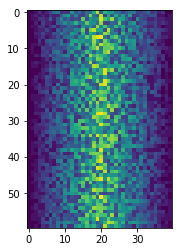

In [87]:
image = plt.imshow(data) # cmap=... !(jet, rainbow)... perceptual colormaps
plt.show()

In [86]:
%matplotlib inline
#notebook, qt...

<div class="panel panel-info">
<div class="panel-heading">
<h3 class="panel-title">
IPython Magic!
</h3>
</div>
<div class="panel-body">
The % indicates an IPython magic function - a funciton that is valid only within the nobook environment.
</div>
</div>

Let's plot data array (the average inflammation per day):

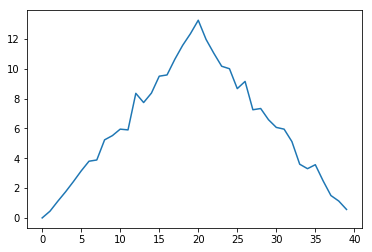

In [90]:
ave_inflammation = data.mean(axis=0)
ave_plot = plt.plot(ave_inflammation)

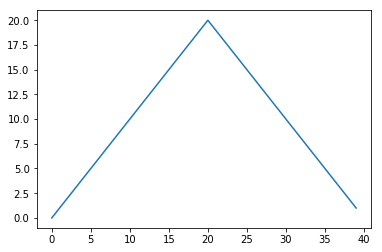

In [93]:
plt.plot(data.max(axis=0))
plt.show()

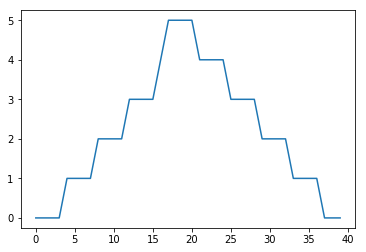

In [94]:
plt.plot(data.min(axis=0))
plt.show()

Average inflammation over time. Linear plot:

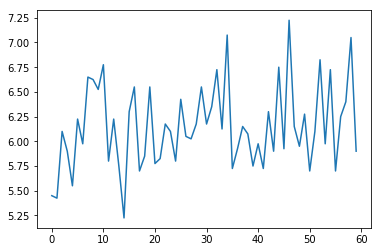

In [92]:
ave_inflammation_time = data.mean(axis=1)
plt.plot(ave_inflammation_time)
plt.show()

This plot does not correspond with the expected. The model predices a smooth sharper rise and a slower after fall. Let's have a look to the other statistics:

None of them seems very likely to fit the model. <strong> Something could be wrong with the data</strong>
<br>
<br>
We can further improve the visualization by grouping plots in a multiplot:

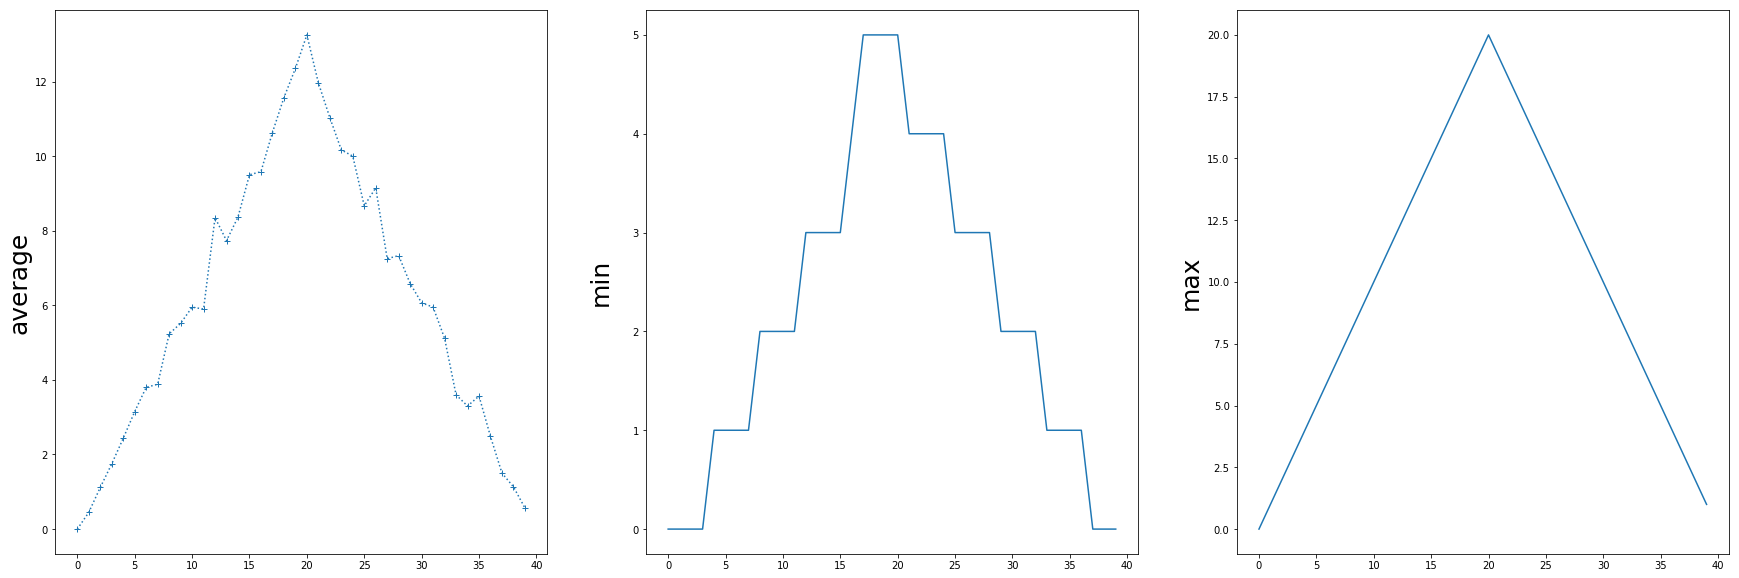

In [136]:
#fig, axarr = plt.subplots(1, 3)
fig = plt.figure(figsize=(30.0, 10.0))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_ylabel('average', fontsize=25)
ax1.plot(data.mean(axis=0), '+:')
ax2.set_ylabel('min', fontsize=25, labelpad=20)
ax2.plot(data.min(axis=0))
ax3.set_ylabel('max', fontsize=25)
ax3.plot(data.max(axis=0))
#fig.tight_layout()
plt.show()

## Exercises 
(https://scw-ss.github.io/python-novice-inflammation-2016-06-27-cfmehu/01-numpy.html)

What does the following program print out?

<code>
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)

<code/>

In [115]:
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)

Hopper Grace


### Slicing strings

In [117]:
element = 'oxygen'
print('first three characters:', element[:3])
print('last three characters:', element[3:])

first three characters: oxy
last three characters: gen


What is the value of element[:4]? What about element[4:]? Or element[:]?

In [118]:
element[:4]

'oxyg'

In [119]:
element[4:]

'en'

In [120]:
element[:]

'oxygen'

What is element[-1]? What is element[-2]?

In [126]:
element[-1]

'n'

In [122]:
element[-2]

'e'

Given those answers, explain what element[1:-1] does.

In [123]:
element[1:-1]

'xyge'

Reverse:

In [125]:
element[::-1]

'negyxo'